# pytorch practice

https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part1_bigrams.ipynb
https://www.youtube.com/watch?v=PaCmpygFfXo&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=3

data is downloaded from: https://github.com/karpathy/makemore/tree/master


In [1]:
import torch

In [2]:
!ls data

names.txt


In [3]:
words = open('data/names.txt').readlines()

In [4]:
words[:10]

['emma\n',
 'olivia\n',
 'ava\n',
 'isabella\n',
 'sophia\n',
 'charlotte\n',
 'mia\n',
 'amelia\n',
 'harper\n',
 'evelyn\n']

In [5]:
max(len(w.strip()) for w in words)

15

In [6]:
min(len(w.strip()) for w in words)

2

In [7]:
# bigram

m = {}
for w in words:
    ch_arr = ['<S>'] + list(w.strip()) + ['<E>']
    # print(ch_arr)
    for ch1, ch2 in zip(ch_arr, ch_arr[1:]):
        bg = (ch1, ch2)
        m[bg] = m.get(bg, 0) + 1

sorted(m.items(), key=lambda kv: kv[1], reverse=True)[:20]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422)]

In [8]:
s = set(''.join(words))
s.remove('\n')
s.add('.')
char_list = sorted(list(s))
itos = {i:c for i,c in enumerate(char_list)}
stoi = {c:i for i,c in itos.items()}
print(stoi)

{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [9]:
N = torch.zeros((27, 27), dtype=torch.int32)

for w in words:
    char_list = ['.'] + list(w.strip()) + ['.']
    for ch1, ch2 in zip(char_list, char_list[1:]):
        # print(ch1, ch2)
        N[stoi[ch1], stoi[ch2]] += 1

print(N[0])

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)


(-0.5, 26.5, 26.5, -0.5)

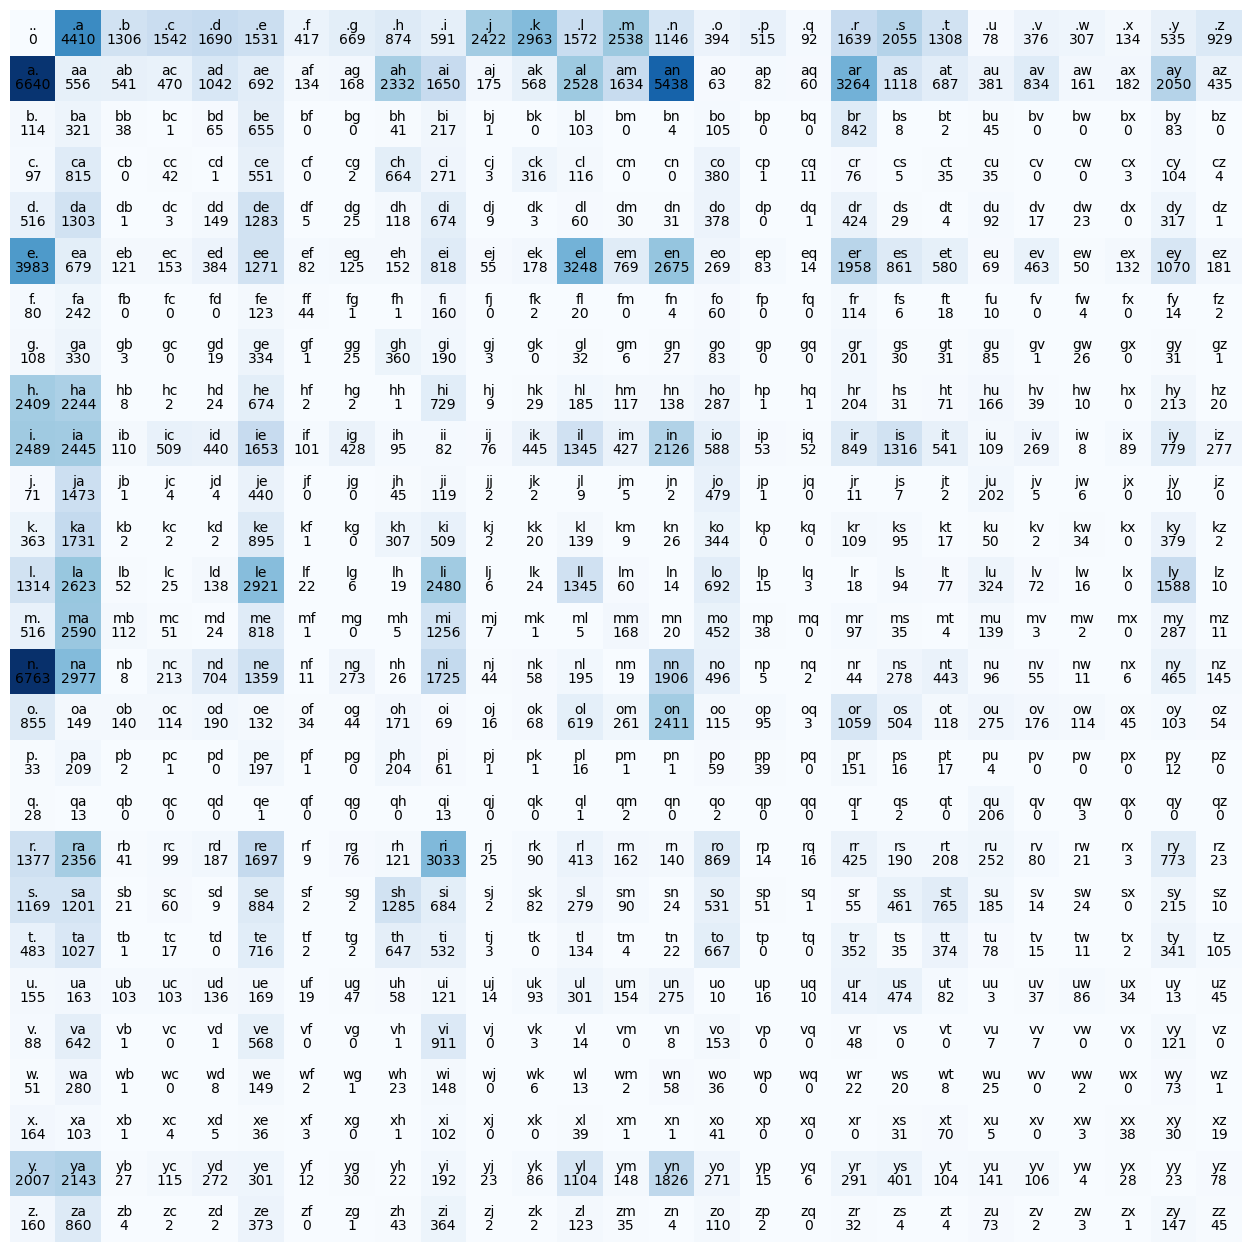

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        plt.text(j, i, itos[i]+itos[j], ha='center', va='bottom')
        plt.text(j, i, N[i, j].item(), ha='center', va='top')

plt.axis('off')

In [11]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [12]:
p = N[0]
p = p / p.sum()

In [13]:
gen = torch.Generator().manual_seed(42)
torch.rand(3, generator=gen)


tensor([0.8823, 0.9150, 0.3829])

In [14]:
ix = torch.multinomial(p, num_samples=30, replacement=True, generator=gen)
ix

tensor([13, 18,  7,  1, 15, 11, 10, 12,  1, 11, 13,  2, 12,  1, 12, 13, 10,  4,
        14, 20, 11,  4, 14, 11, 10,  5, 13, 22,  2,  4])

In [15]:
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [16]:
P = N.float()

In [17]:
P.shape

torch.Size([27, 27])

In [18]:
P.sum(1)

tensor([32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
        17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
        12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.])

In [36]:
t1 = torch.Tensor([[1, 2, 3], [4, 5, 6]])
t1.shape

torch.Size([2, 3])

In [37]:
t1

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [38]:
t1.sum(0, keepdim=True)

tensor([[5., 7., 9.]])

In [39]:
t1 / t1.sum(1, keepdim=True)

tensor([[0.1667, 0.3333, 0.5000],
        [0.2667, 0.3333, 0.4000]])

In [40]:
t1[1]

tensor([4., 5., 6.])

In [41]:
t1[1, 1]

tensor(5.)

In [42]:
t2 = t1 / t1.sum(1, keepdim=True)
print(t2)
p = t2[1]
idx = torch.multinomial(p, replacement=True, num_samples=10, generator=gen)
p[idx]

tensor([[0.1667, 0.3333, 0.5000],
        [0.2667, 0.3333, 0.4000]])


tensor([0.4000, 0.2667, 0.4000, 0.4000, 0.3333, 0.4000, 0.4000, 0.4000, 0.3333,
        0.3333])

In [19]:
P = N
P = P / P.sum(1, keepdim=True)
P[1]

tensor([0.1960, 0.0164, 0.0160, 0.0139, 0.0308, 0.0204, 0.0040, 0.0050, 0.0688,
        0.0487, 0.0052, 0.0168, 0.0746, 0.0482, 0.1605, 0.0019, 0.0024, 0.0018,
        0.0963, 0.0330, 0.0203, 0.0112, 0.0246, 0.0048, 0.0054, 0.0605, 0.0128])

In [20]:
# verify that the normalization is working
P.sum(1, keepdim=True)[:10]

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000]])

In [21]:
# bigram model generation
ret = []
row = 3
ret.append(itos[row])
while True:
    p = P[row]
    col = torch.multinomial(P[1], replacement=True, num_samples=1, generator=gen)[0].item()
    # print('col = {}'.format(col))
    if col == 0:
        break
        
    ret.append(itos[col])
    row = col

print(''.join(ret))

crrnn


In [23]:
# train a simple NN
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w.strip()) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [24]:
print(xs[:10], ys[:10])

tensor([ 0,  5, 13, 13,  1,  0, 15, 12,  9, 22]) tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9])


In [25]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc.shape

torch.Size([228146, 27])

In [26]:
xenc.shape

torch.Size([228146, 27])

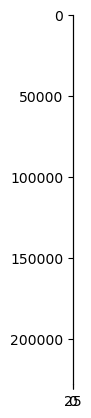

In [27]:
plt.imshow(xenc)

In [28]:
W = torch.randn((27, 27))

In [29]:
torch.tensor([[1, 2], [3, 4]]) @ torch.tensor([[1], [1]])

tensor([[3],
        [7]])

In [30]:
xenc.shape

torch.Size([228146, 27])

In [77]:
# make it as value reasonable to count
torch.randn((1, 100)).exp()

tensor([[0.4407, 3.2606, 2.2862, 1.0428, 0.5473, 0.2704, 0.6704, 2.7784, 1.0378,
         0.2866, 0.5320, 7.7516, 0.4957, 0.3919, 2.9999, 3.1573, 0.7134, 0.2390,
         2.0716, 1.3123, 0.4541, 0.9816, 0.3652, 1.5927, 0.5970, 0.5368, 0.7783,
         1.0233, 0.4466, 6.1011, 4.5369, 0.6178, 0.4180, 2.1752, 1.2157, 1.9318,
         3.6062, 1.8163, 0.2976, 1.5629, 1.7848, 1.4253, 3.1530, 1.2290, 1.4787,
         1.6785, 0.5016, 1.5859, 1.8385, 0.6926, 0.2227, 1.3259, 1.4836, 2.1186,
         0.6229, 6.8572, 2.4067, 3.1812, 0.4882, 2.8149, 1.8398, 6.9025, 0.7487,
         0.6665, 0.3101, 2.9661, 2.5964, 8.3092, 1.3263, 0.1541, 1.1425, 0.6703,
         1.4513, 0.6621, 1.9823, 1.5552, 0.6358, 2.6495, 8.3389, 1.0107, 0.4372,
         3.2043, 3.3804, 0.3031, 2.7986, 0.3645, 1.1218, 1.8059, 0.4263, 3.0966,
         2.7838, 0.7119, 0.1596, 1.5714, 4.2849, 4.7197, 1.7546, 2.0959, 0.8091,
         1.0875]])

In [32]:
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
probs[2]

tensor([0.0084, 0.0122, 0.0044, 0.0370, 0.0551, 0.1386, 0.0510, 0.0178, 0.0081,
        0.0873, 0.0181, 0.0067, 0.0175, 0.0022, 0.0098, 0.0025, 0.2974, 0.1122,
        0.0188, 0.0238, 0.0149, 0.0115, 0.0128, 0.0024, 0.0197, 0.0069, 0.0026])

In [34]:
probs.shape

torch.Size([228146, 27])

In [82]:
probs.sum(1, keepdim=True)

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000]])

In [69]:
torch.tensor([-1, 0, 1]).exp()

tensor([0.3679, 1.0000, 2.7183])

In [78]:
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0

In [87]:
ys[:3]

tensor([ 5, 13, 13])

In [99]:
xs[:3]

tensor([ 0,  5, 13])

In [100]:
xenc[:3]

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [44]:
ys[:10]

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9])

In [86]:
# NN training
W = torch.randn((27, 27), generator=gen, requires_grad=True)

In [96]:
num = 100000

for k in range(1):
    xs1 = xs[:num]
    ys1 = ys[:num]
    
    xenc = F.one_hot(xs1, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)

    # probs[torch.arange(100), ys[:100]]
    loss = -probs[torch.arange(num), ys1].log().mean() + 0.01*(W**2).mean()
    print(loss.item())
    
    # bp
    W.grad = None
    loss.backward()
    
    W.data += -50 * W.grad

2.6278939247131348


In [ ]:
probs[:, ys].log().mean()

In [101]:


for i in range(5):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True)
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=gen)[0]
        if ix == 0:
            break
        out.append(itos[ix.item()])
    print(''.join(out))

almae
wcnenhbvipplgypma
a
mivli
ne


In [102]:
xs.shape, ys.shape

(torch.Size([228146]), torch.Size([228146]))

In [111]:
def build_dataset(input_words, block_size = 3):
    X, Y = [], []
    
    """
    emma. =>
    _ _ _ -> e
    _ _ e -> m
    _ e m -> m
    e m m -> a
    m m a -> .
    """
    
    for w in input_words:
        context = [0] * block_size
        # allow prefix 0
        for ch in w.strip() + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(f"{X.shape}, {X.dtype}, {Y.shape}, {Y.dtype}")
    return X, Y

In [116]:
# build dataset

import random
random.seed(42)
input_words = words
random.shuffle(input_words)
n1 = int(0.8*len(input_words))
n2 = int(0.9*len(input_words))

Xtr, Ytr = build_dataset(input_words[:n1])
Xdev, Ydev = build_dataset(input_words[n1:n2])
Xte, Yte = build_dataset(input_words[n2:])

torch.Size([182580, 3]), torch.int64, torch.Size([182580]), torch.int64
torch.Size([22767, 3]), torch.int64, torch.Size([22767]), torch.int64
torch.Size([22799, 3]), torch.int64, torch.Size([22799]), torch.int64


In [117]:
Xtr[:10], Ytr[:10]

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5,  2],
         [ 5,  2, 18],
         [ 2, 18,  9],
         [18,  9, 13],
         [ 9, 13,  1],
         [ 0,  0,  0],
         [ 0,  0,  8],
         [ 0,  8,  9]]),
 tensor([ 5,  2, 18,  9, 13,  1,  0,  8,  9, 12]))

In [118]:
# embedding
# 2 is the emb dim. 27 is the vocabulary, so C[[1, 2]] is emb array like C[1], C[2]  
C = torch.randn((27, 2))

In [126]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [127]:
emb.view(-1, 6)

tensor([[-0.3281,  2.5878, -0.3281,  2.5878, -0.3281,  2.5878],
        [-0.3281,  2.5878, -0.3281,  2.5878, -1.4312,  0.7751],
        [-0.3281,  2.5878, -1.4312,  0.7751,  1.2215,  0.4432],
        ...,
        [ 0.2944, -0.4311,  0.2944, -0.4311, -1.0934, -0.3802],
        [ 0.2944, -0.4311, -1.0934, -0.3802,  0.2944, -0.4311],
        [-1.0934, -0.3802,  0.2944, -0.4311,  0.5702,  0.3726]])

In [131]:
aa1 = torch.randn((5, 2))
aa2 = torch.randn(2)

In [132]:
aa1, aa2

(tensor([[ 0.4724, -0.9028],
         [-0.0627, -0.5739],
         [ 0.3250,  0.1778],
         [ 0.1764,  0.7958],
         [-2.0910, -0.8421]]),
 tensor([-0.6852, -0.4504]))

In [133]:
aa1 + aa2

tensor([[-0.2128, -1.3532],
        [-0.7479, -1.0244],
        [-0.3602, -0.2726],
        [-0.5088,  0.3453],
        [-2.7762, -1.2925]])

In [183]:
C = torch.randn((27, 10), generator=gen)
W1 = torch.randn((30, 200), generator=gen)
b1 = torch.randn(200, generator=gen)
W2 = torch.randn((200, 27), generator=gen)
b2 = torch.randn(27, generator=gen)

In [184]:
emb.view(-1, 30).shape, W1.shape, b1.shape

(torch.Size([32, 30]), torch.Size([30, 200]), torch.Size([200]))

In [185]:
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
h.shape

torch.Size([32, 200])

In [186]:
logits = h @ W2 + b2

In [187]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
prob.shape

torch.Size([32, 27])

In [188]:
loss = -prob[torch.arange(32), Y[:32]].log().mean()
loss

tensor(24.9622, grad_fn=<NegBackward0>)

In [189]:
params = [C, W1, b1, W2, b2]
for p in params:
    p.requires_grad = True

In [190]:
C.shape

torch.Size([27, 10])

In [191]:
stepi, lossi = [], []

for i in range(200000):
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ix]]  # (32, 3, 10)
    # print(emb.shape)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    if (i+1) % 10000 == 0:
        print(i, loss.item(), lr)

    # BP
    for p in params:
        p.grad = None
    loss.backward()

    lr = 0.1 if 1 < 100000 else 0.01
    for p in params:
        p.data += -lr * p.grad

    stepi.append(i)
    lossi.append(loss.log10().item())

    

9999 3.3671231269836426 0.1
19999 2.3680949211120605 0.1
29999 2.2724661827087402 0.1
39999 2.6941139698028564 0.1
49999 2.5823020935058594 0.1
59999 2.2747902870178223 0.1
69999 1.9101439714431763 0.1
79999 2.2997853755950928 0.1
89999 2.2574520111083984 0.1
99999 2.043473482131958 0.1
109999 2.021329164505005 0.1
119999 2.113654375076294 0.1
129999 2.5278568267822266 0.1
139999 2.0139057636260986 0.1
149999 2.026073932647705 0.1
159999 2.3498153686523438 0.1
169999 2.0559606552124023 0.1
179999 2.3755578994750977 0.1
189999 1.894223690032959 0.1
199999 2.3321566581726074 0.1


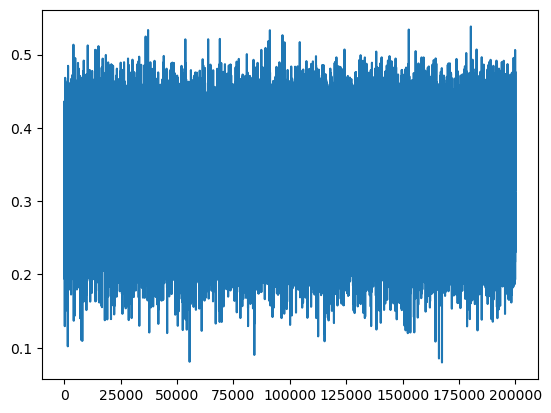

In [182]:
plt.plot(stepi, lossi)

In [192]:
emb = C[Xdev]
logits = torch.tanh(emb.view(-1, 30) @ W1 + b1) @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2417, grad_fn=<NllLossBackward0>)

In [193]:
C[:,0]

tensor([-0.2921, -0.0150,  0.9319,  0.5625,  1.0431, -0.7804,  0.2289,  0.4979,
        -0.0856, -0.1028,  0.6463,  0.4131,  1.0012,  0.7652,  0.8772, -1.1886,
         0.2596,  0.0941,  0.3456,  0.2398,  0.3611, -1.1803,  1.0467,  0.5190,
        -1.2165, -0.2854,  0.2206], grad_fn=<SelectBackward0>)

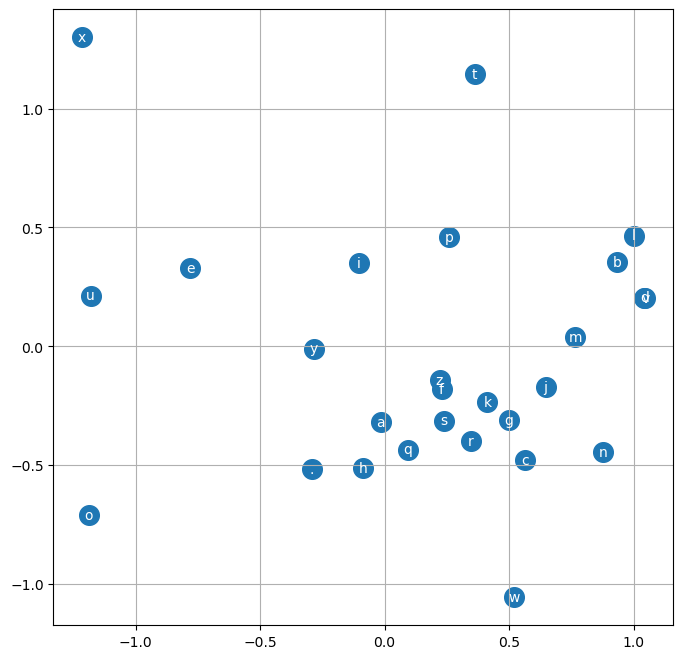

In [195]:
# visualize
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

In [200]:
for i in range(5):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        logits = torch.tanh(emb.view(-1, 30) @ W1 + b1) @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=gen)[0].item()
        context = context[1:] + [ix]
        if ix == 0:
            break
        out.append(ix)
    
    print(''.join([itos[x] for x in out]))

maraberk
cioussone
zoau
shana
darta


In [201]:
vocab_size = len(itos)
n_embd = 10  # dim of char emb vectors

In [ ]:
# MLP


In [217]:
C = torch.randn((7, 2))
C

tensor([[ 0.3362, -0.0642],
        [ 0.2322,  0.7888],
        [-0.8353,  0.7063],
        [ 0.1959, -0.1653],
        [-1.4366, -0.9702],
        [-0.2051, -0.1377],
        [-0.4172, -0.6635]])

In [220]:
Xtr.shape

torch.Size([182580, 3])

In [221]:
xx1

tensor([[1, 2, 1],
        [3, 4, 3],
        [5, 6, 5]])

In [224]:
C[xx1]

tensor([[[ 0.2322,  0.7888],
         [-0.8353,  0.7063],
         [ 0.2322,  0.7888]],

        [[ 0.1959, -0.1653],
         [-1.4366, -0.9702],
         [ 0.1959, -0.1653]],

        [[-0.2051, -0.1377],
         [-0.4172, -0.6635],
         [-0.2051, -0.1377]]])

In [225]:
C[xx1].view(3, -1)

tensor([[ 0.2322,  0.7888, -0.8353,  0.7063,  0.2322,  0.7888],
        [ 0.1959, -0.1653, -1.4366, -0.9702,  0.1959, -0.1653],
        [-0.2051, -0.1377, -0.4172, -0.6635, -0.2051, -0.1377]])

In [219]:
display(C)
display(xx1)
C[xx1]

tensor([[ 0.3362, -0.0642],
        [ 0.2322,  0.7888],
        [-0.8353,  0.7063],
        [ 0.1959, -0.1653],
        [-1.4366, -0.9702],
        [-0.2051, -0.1377],
        [-0.4172, -0.6635]])

tensor([[1, 2, 1],
        [3, 4, 3],
        [5, 6, 5]])

tensor([[[ 0.2322,  0.7888],
         [-0.8353,  0.7063],
         [ 0.2322,  0.7888]],

        [[ 0.1959, -0.1653],
         [-1.4366, -0.9702],
         [ 0.1959, -0.1653]],

        [[-0.2051, -0.1377],
         [-0.4172, -0.6635],
         [-0.2051, -0.1377]]])

In [227]:
n_emb = 10
n_hidden = 200
vocab_size = len(itos)

C = torch.randn((vocab_size, n_emb), generator=gen)
W1 = torch.randn((n_emb * block_size, n_hidden), generator=gen) * (5/3)/((n_emb * block_size)**0.5)
# b1 = torch.randn((n_hidden, ), generator=gen)
W2 = torch.randn((n_hidden, vocab_size), generator=gen) * 0.01
b2 = torch.randn(vocab_size, generator=gen) * 0

# batch norm param
bngain = torch.ones((1, n_hidden))
bnbias = torch.zeros((1, n_hidden))
bnmean_running = torch.zeros((1, n_hidden))
bnstd_running = torch.zeros((1, n_hidden))

params = [C, W1, W2, b2, bngain, bnbias]
print(sum(p.nelement() for p in params))
for p in params:
    p.requires_grad = True



12097


In [229]:
# optimization

max_steps = 100000
batch_size = 32
lossi = []

for i in range(max_steps):
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=gen)
    Xb, Yb = Xtr[ix], Ytr[ix]

    # forward pass
    emb = C[Xb]  # (, vocab_size, n_emb)
    embcat = emb.view(emb.shape[0], -1)  # (, block_size, n_emb)
    # linear layer
    hpreact = embcat @ W1  # hidden pre-activation

    # batch norm layer
    bnmeani = hpreact.mean(0, keepdim=True)
    bnstdi = hpreact.std(0, keepdim=True)
    hpreact = bngain * (hpreact - bnmeani) / bnstdi + bnbias
    with torch.no_grad():
        bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
        bnstd_running = 0.999 * bnstd_running + 0.001 * bnstdi

    h = torch.tanh(hpreact)
    logits = h @ W2 + b2  # output layer
    loss = F.cross_entropy(logits, Yb)

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in params:
        p.data += -lr * p.grad

    # tracking
    if i % 1000 == 0:
        print(f"{i}/{max_steps}: {loss.item():.4f}")
    lossi.append(loss.log10().item())

0/100000: 3.3012
1000/100000: 2.4091
2000/100000: 2.8645
3000/100000: 2.6195
4000/100000: 2.3530
5000/100000: 2.2508
6000/100000: 2.3579
7000/100000: 2.7641
8000/100000: 2.0412
9000/100000: 2.3389
10000/100000: 2.2109
11000/100000: 1.9589
12000/100000: 2.5076
13000/100000: 2.6974
14000/100000: 2.2451
15000/100000: 2.1728
16000/100000: 2.1701
17000/100000: 2.4876
18000/100000: 2.6088
19000/100000: 2.4674
20000/100000: 2.1763
21000/100000: 1.9061
22000/100000: 2.1325
23000/100000: 2.1635
24000/100000: 2.1381
25000/100000: 1.9981
26000/100000: 2.4323
27000/100000: 2.2283
28000/100000: 2.3279
29000/100000: 1.9080
30000/100000: 2.2328
31000/100000: 2.4636
32000/100000: 2.5403
33000/100000: 2.4672
34000/100000: 2.5262
35000/100000: 2.0109
36000/100000: 2.3394
37000/100000: 1.9527
38000/100000: 2.0677
39000/100000: 2.0374
40000/100000: 1.7668
41000/100000: 2.3689
42000/100000: 2.3784
43000/100000: 2.2486
44000/100000: 1.8823
45000/100000: 2.1827
46000/100000: 2.2403
47000/100000: 2.1604
48000

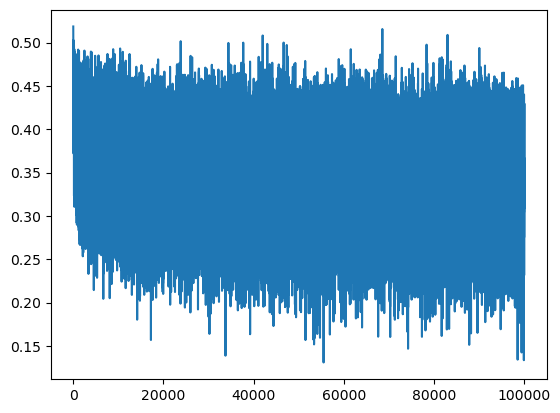

In [230]:
plt.plot(lossi)

In [231]:
@torch.no_grad()  # disable gradient tracking
def split_loss(split):
    x,y = {
        'train': (Xtr, Ytr),
        'val': (Xdev, Ydev),
        'test': (Xte, Yte),
    }[split]
    emb = C[x]
    embcat = emb.view(emb.shape[0], -1)
    hpreact = embcat @ W1
    hpreact = bngain * (hpreact - bnmean_running) / bnstd_running + bnbias
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, y)
    print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.138819456100464
val 2.1786599159240723


In [237]:
torch.ones((2,3)) + torch.ones(3)

tensor([[2., 2., 2.],
        [2., 2., 2.]])

In [247]:
# write a NN

class Linear:

    def __init__(self, fan_in, fan_out, bias=True):
        self.out = None
        # W (fan_in, fan_out)
        self.weight = torch.randn((fan_in, fan_out), generator=gen) / fan_in**0.5
        self.bias = torch.zeros(fan_out) if bias else None  # b (N, fan_out)

    def __call__(self, x):
        # X @ W -> (N, fan_in) x (fan_in, fan_out) -> (N, fan_out)
        self.out = x @ self.weight
        if self.bias is not None:
            self.out += self.bias
        return self.out

    def parameters(self):
        return [self.weight] + [self.bias] if self.bias is not None else []


class BatchNorm1d:

    def __init__(self, dim, eps=1e-5, momentum=0.1):
        self.out = None
        self.eps = eps
        self.momentum = momentum
        self.training = True
        # params
        self.gamma = torch.ones(dim)
        self.beta = torch.zeros(dim)
        # buffers
        self.running_mean = torch.zeros(dim)
        self.running_var = torch.ones(dim)

    def __call__(self, x):
        # forward pass
        if self.training:
            xmean = x.mean(0, keepdim=True)
            xvar = x.var(0, keepdim=True)
        else:
            xmean = x.running_mean
            xvar = x.running_var

        xhat = (x-xmean) / torch.sqrt(xvar + self.eps)  # normalize
        self.out = self.gamma * xhat + self.beta

        # update buffer
        if self.training:
            with torch.no_grad():
                self.running_mean = (1-self.momentum) * self.running_mean + self.momentum * xmean
                self.running_var = (1-self.momentum) * self.running_var + self.momentum * xvar

        return self.out

    def parameters(self):
        return [self.gamma, self.beta]

class Tanh:
    def __call__(self, x):
        self.out = torch.tanh(x)
        return self.out
    def parameters(self):
        return []

In [250]:
n_emb = 10
n_hidden = 100

C = torch.randn((vocab_size, n_emb), generator=gen)
layers = [
    Linear(n_emb * block_size, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    Linear(          n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    Linear(          n_hidden, vocab_size, bias=False), BatchNorm1d(vocab_size)
]

with torch.no_grad():
    layers[-1].gamma *= 0.1
    for layer in layers[:-1]:
        if isinstance(layer, Linear):
            layer.weight *= 1.0  #5/3

parameters = [C] + [p for layer in layers for p in layer.parameters()]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

724


In [251]:
max_steps = 200000
batch_size = 32
lossi = []
ud = []

for i in range(max_steps):
    ix = torch.randint(0, Xtr.shape[0], (batch_size, ), generator=gen)
    Xb, Yb = Xtr[ix], Ytr[ix]  # batch X, Y

    # forward pass
    emb = C[Xb]
    x = emb.view(emb.shape[0], -1)  # concat
    for layer in layers:
        x = layer(x)
    loss = F.cross_entropy(x, Yb)

    # backward pass
    for layer in layers:
        layer.out.retain_grad()
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 150000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # tracking
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())
    with torch.no_grad():
        ud.append([((lr*p.grad).std() / p.data.std()).log10().item() for p in parameters])


      0/ 200000: 3.3463
  10000/ 200000: 2.6440
  20000/ 200000: 2.3274
  30000/ 200000: 2.3384
  40000/ 200000: 2.6854
  50000/ 200000: 2.2597
  60000/ 200000: 2.4923
  70000/ 200000: 2.6451
  80000/ 200000: 2.3967
  90000/ 200000: 2.3582
 100000/ 200000: 2.3096
 110000/ 200000: 2.9185
 120000/ 200000: 2.7373
 130000/ 200000: 2.3905
 140000/ 200000: 2.6344
 150000/ 200000: 2.6691
 160000/ 200000: 2.3785
 170000/ 200000: 2.5010
 180000/ 200000: 2.2831
 190000/ 200000: 2.3178


2
1
weight     (100,) | mean -0.004263 | std 2.876405e-02
1
weight     (100,) | mean -0.001719 | std 1.305612e-02
1
weight     (100,) | mean +0.001801 | std 2.909780e-02
1
weight     (100,) | mean +0.001361 | std 1.154796e-02
1
weight      (27,) | mean +0.001863 | std 2.762216e-02
1
weight      (27,) | mean -0.000000 | std 3.414324e-02


Text(0.5, 1.0, 'weights gradient distribution')

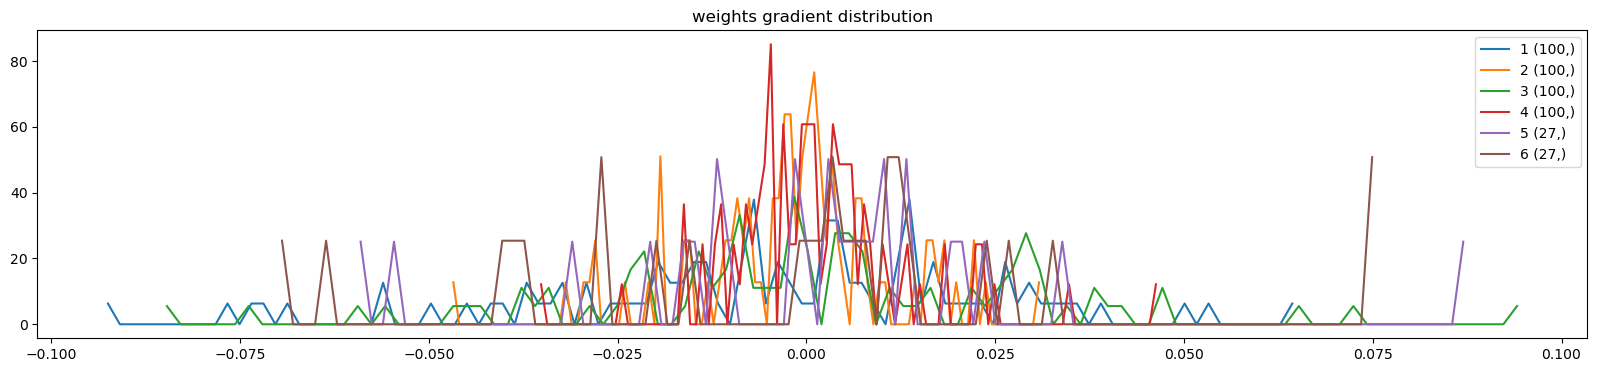

In [255]:
plt.figure(figsize=(20,4))
legends = []
for i,p in enumerate(parameters):
    print(p.ndim)
    t = p.grad
    if p.ndim == 1:
        print('weight %10s | mean %+f | std %e' % (tuple(p.shape), t.mean(), t.std()))
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'{i} {tuple(p.shape)}')
plt.legend(legends)
plt.title('weights gradient distribution')